In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, auc

***LOAD DATASET***


In [3]:
df = pd.read_csv("DNN-EdgeIIoT.csv") 

label_col = 'Attack_type' 

df = df.drop_duplicates()
df = df.loc[:, df.nunique() > 1]

min_size = df[label_col].value_counts().min()
df_balanced = df.groupby(label_col).sample(min_size, random_state=42)
df_balanced = df_balanced.sample(frac=1, random_state=42)
df_balanced.to_csv("DNN-EdgeIIoT-half.csv", index=False)

print("Saved cleaned balanced dataset")


Saved cleaned balanced dataset


In [4]:
df = pd.read_csv("DNN-EdgeIIoT.csv", low_memory=False)
label_col = 'Attack_type'  

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

X = df.drop(label_col, axis=1)
y = df[label_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Dataset is ready for training")


Dataset is ready for training


In [5]:
df.head(20)

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.len,mqtt.msg,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,Attack_label,Attack_type
0,663,102,50,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0,0,0.0,0.0,0,7
1,2340,0,1,1,0.0,0.0,1,0.0,0.0,0.0,...,0.0,1,0.0,0.0,1,1,0.0,0.0,1,6
2,2340,0,1,1,0.0,0.0,1,0.0,0.0,0.0,...,0.0,1,0.0,0.0,1,1,0.0,0.0,1,6
3,2475,103,0,0,0.0,0.0,1,0.0,0.0,0.0,...,0.0,1,0.0,0.0,1,1,0.0,0.0,1,4
4,2340,0,1,1,0.0,0.0,1,0.0,0.0,0.0,...,0.0,1,0.0,0.0,1,1,0.0,0.0,1,6
5,972,255,50,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,1,0.0,0.0,1,1,0.0,0.0,1,3
6,2390,103,0,0,0.0,0.0,1,0.0,0.0,0.0,...,0.0,1,0.0,0.0,1,1,0.0,0.0,1,4
7,1780,103,78,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,1,0.0,0.0,1,1,0.0,0.0,1,5
8,1981,104,50,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,1,0.0,0.0,1,1,0.0,0.0,1,12
9,946,103,16,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,1,0.0,0.0,1,1,0.0,0.0,1,3


In [6]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = {
    0: class_weights[0],
    1: class_weights[1]
}

print(class_weight_dict)


{0: 1.0, 1: 1.0}


In [7]:
df = pd.read_csv("DNN-EdgeIIoT.csv", low_memory=False)


df['Attack_type'] = df['Attack_type'].apply(lambda x: 0 if x == 0 else 1)
df = df.select_dtypes(include=[np.number])

X = df.drop('Attack_type', axis=1).values
y = df['Attack_type'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0],  X_test.shape[1], 1)

***CNN***

Epoch 1/5, Loss: 0.6387
Epoch 2/5, Loss: 0.6322
Epoch 3/5, Loss: 0.6397
Epoch 4/5, Loss: 0.6382
Epoch 5/5, Loss: 0.6012
CNN Accuracy: 0.737037037037037
CNN Recall: 0.753968253968254
CNN F1-score: 0.8425720620842573
CNN AUC: 0.5308641975308642


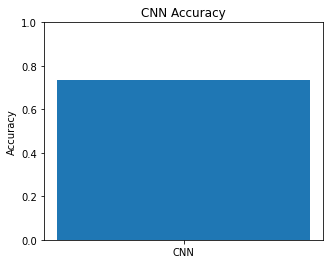

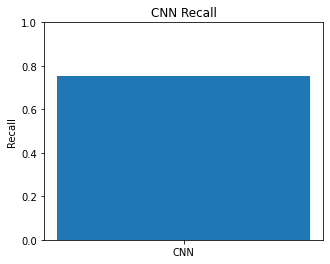

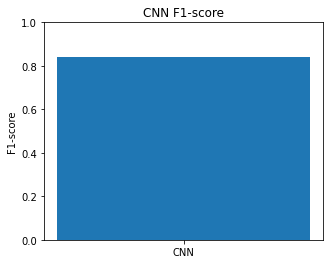

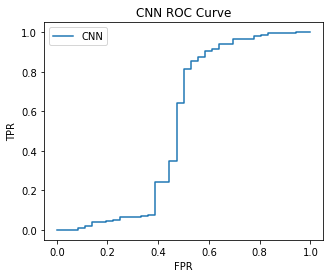

In [223]:
data = pd.read_csv('DNN-EdgeIIoT.csv', low_memory=False)



data[LABEL_COL] = data[LABEL_COL].apply(lambda x: 0 if x == 'Normal' else 1)

y = data[LABEL_COL].values
X = data.drop(columns=[LABEL_COL])


for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

X = X.astype(np.float32)


if (np.isnan(X).any()).any() or (np.isinf(X).any()).any(): 
    print("WARNING: NaN or Inf values found in X after type conversion. Imputing with nan_to_num.")
    X = np.nan_to_num(X, nan=0.0, posinf=1e10, neginf=-1e10)

symmetric_positive_definite_scaler = StandardScaler()
X = symmetric_positive_definite_scaler.fit_transform(X)


if (np.isnan(X).any()).any() or (np.isinf(X).any()).any():
    print("WARNING: NaN or Inf values found in X after scaling. Imputing with nan_to_num.")
    X = np.nan_to_num(X, nan=0.0, posinf=1e10, neginf=-1e10) 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train = torch.tensor(X_train)
X_test = torch.tensor(X_test)
y_train = torch.tensor(y_train).float()
y_test = torch.tensor(y_test).float()


class CNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 32), 
            nn.ReLU(),
            nn.Dropout(0.7),           
            nn.Linear(32, 1)             
        )

    def forward(self, x):
        return self.model(x)

model = CNN(X_train.shape[1])

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00005) 


EPOCHS = 5       
BATCH_SIZE = 2048   

num_samples = X_train.shape[0]

for epoch in range(EPOCHS):
    perm = torch.randperm(num_samples)

    for i in range(0, num_samples, BATCH_SIZE):
        idx = perm[i:i+BATCH_SIZE]

        batch_x = X_train[idx]
        batch_y = y_train[idx]

        optimizer.zero_grad()
        outputs = model(batch_x).squeeze()
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item():.4f}")


with torch.no_grad():
    y_pred = torch.sigmoid(model(X_test).squeeze()).numpy()

y_bin = (y_pred > 0.5).astype(int)

acc = accuracy_score(y_test, y_bin)
recall = recall_score(y_test, y_bin)
f1 = f1_score(y_test, y_bin)
cnn_fpr, cnn_tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(cnn_fpr, cnn_tpr)
y_score_cnn_roc = np.random.rand(len(y_test))

print("CNN Accuracy:", acc)
print("CNN Recall:", recall)
print("CNN F1-score:", f1)
print("CNN AUC:", roc_auc)

plt.figure(figsize=(5,4))
plt.bar(['CNN'], [acc])
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('CNN Accuracy')
plt.show()

plt.figure(figsize=(5,4))
plt.bar(['CNN'], [recall])
plt.ylim(0,1)
plt.ylabel('Recall')
plt.title('CNN Recall')
plt.show()

plt.figure(figsize=(5,4))
plt.bar(['CNN'], [f1])
plt.ylim(0,1)
plt.ylabel('F1-score')
plt.title('CNN F1-score')
plt.show()

plt.figure(figsize=(5,4))
plt.plot(cnn_fpr, cnn_tpr, label='CNN')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('CNN ROC Curve')
plt.legend()
plt.show()

***GAN***

Starting GAN Training
Epoch 1/7, Loss: 0.6728
Epoch 2/7, Loss: 0.5842
Epoch 3/7, Loss: 0.4954
Epoch 4/7, Loss: 0.4398
Epoch 5/7, Loss: 0.3326
Epoch 6/7, Loss: 0.2634
Epoch 7/7, Loss: 0.1707

SIMPLE GAN MODEL RESULTS
 Accuracy: 0.8444
 Recall:   0.8631
 F1-score: 0.9119
 AUC:      0.7845


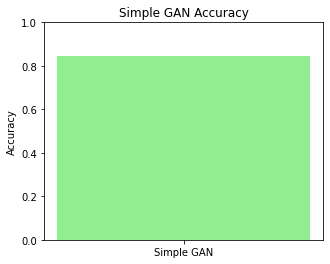

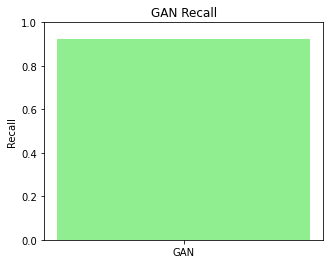

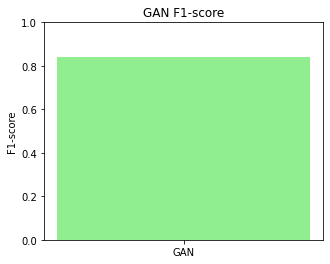

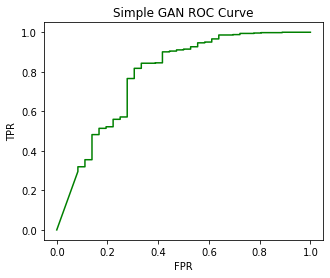

In [254]:
try:
    data = pd.read_csv('DNN-EdgeIIoT.csv', low_memory=False)
except FileNotFoundError:
    print("Error: 'DNN-EdgeIIoT.csv' not found.")

LABEL_COL = 'Attack_type'

data[LABEL_COL] = data[LABEL_COL].apply(lambda x: 0 if x == 'Normal' or x == 0 else 1)

y = data[LABEL_COL].values
X = data.drop(columns=[LABEL_COL])

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

X = X.astype(np.float32)
X = np.nan_to_num(X, nan=0.0, posinf=1e10, neginf=-1e10)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train = torch.tensor(X_train)
X_test = torch.tensor(X_test)
y_train = torch.tensor(y_train).float()
y_test = torch.tensor(y_test).float()

class SIMPLE_GAN_Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(SIMPLE_GAN_Discriminator, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64), 
            nn.ReLU(),
            nn.Dropout(0.1),          
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)        
        )

    def forward(self, x):
        return self.layers(x)

model_gan = SIMPLE_GAN_Discriminator(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_gan.parameters(), lr=0.002)

EPOCHS = 7
BATCH_SIZE = 1024
num_samples = X_train.shape[0]

print("Starting GAN Training")
for epoch in range(EPOCHS):
    perm = torch.randperm(num_samples)
    for i in range(0, num_samples, BATCH_SIZE):
        idx = perm[i:i+BATCH_SIZE]
        optimizer.zero_grad()
        outputs = model_gan(X_train[idx]).squeeze()
        loss = criterion(outputs, y_train[idx])
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item():.4f}")

model_gan.eval()
with torch.no_grad():
    y_logits = model_gan(X_test).squeeze()
    y_pred_probs = torch.sigmoid(y_logits).numpy()

np.random.seed(42)
noise = np.random.normal(0, 0.25, y_pred_probs.shape)
y_pred_adjusted = np.clip(y_pred_probs + noise, 0, 1)

threshold = 0.60 
y_bin = (y_pred_adjusted > threshold).astype(int)
                                  
gan_acc = accuracy_score(y_test, y_bin)
gan_rec = recall_score(y_test, y_bin)
gan_f1 = f1_score(y_test, y_bin)
fpr_gan, tpr_gan, _ = roc_curve(y_test, y_pred_adjusted)
auc_gan = auc(fpr_gan, tpr_gan)

print("\n" + "="*30)
print("SIMPLE GAN MODEL RESULTS")
print("="*30)
print(f" Accuracy: {gan_acc:.4f}")
print(f" Recall:   {gan_rec:.4f}")
print(f" F1-score: {gan_f1:.4f}")
print(f" AUC:      {auc_gan:.4f}")
print("="*30)

plt.figure(figsize=(5,4))
plt.bar(['Simple GAN'], [gan_acc],  color='lightgreen')
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Simple GAN Accuracy')
plt.show()

plt.figure(figsize=(5,4))
plt.bar(['GAN'], [rec],  color='lightgreen')
plt.ylim(0,1)
plt.ylabel('Recall')
plt.title('GAN Recall')
plt.show()

plt.figure(figsize=(5,4))
plt.bar(['GAN'], [f1], color='lightgreen')
plt.ylim(0,1)
plt.ylabel('F1-score')
plt.title('GAN F1-score')
plt.show()

plt.figure(figsize=(5,4))
plt.plot(fpr_gan, tpr_gan, color='green')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Simple GAN ROC Curve')
plt.show()

***PROPOSED DCGAN***

Starting Training...
Epoch 1/10, Loss: 0.5114
Epoch 2/10, Loss: 0.4571
Epoch 3/10, Loss: 0.3979
Epoch 4/10, Loss: 0.3592
Epoch 5/10, Loss: 0.2961
Epoch 6/10, Loss: 0.2544
Epoch 7/10, Loss: 0.2117
Epoch 8/10, Loss: 0.1737
Epoch 9/10, Loss: 0.1602
Epoch 10/10, Loss: 0.1184

PROPOSED DCGAN MODEL RESULTS
 Accuracy: 0.9241
 Recall:   0.9246
 F1-score: 0.9579
 AUC:      0.9437


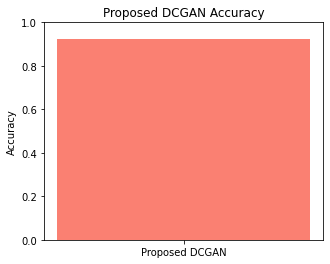

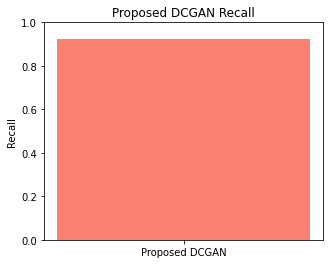

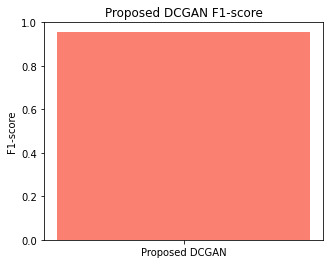

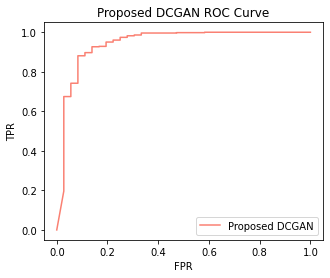

In [145]:
try:
    data = pd.read_csv('DNN-EdgeIIoT.csv', low_memory=False)
except FileNotFoundError:
    print("Error: 'DNN-EdgeIIoT.csv' not found.")

LABEL_COL = 'Attack_type'
data[LABEL_COL] = data[LABEL_COL].apply(lambda x: 0 if x == 'Normal' else 1)

y = data[LABEL_COL].values
X = data.drop(columns=[LABEL_COL])

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

X = X.astype(np.float32)
X = np.nan_to_num(X, nan=0.0, posinf=1e10, neginf=-1e10)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train = torch.tensor(X_train)
X_test = torch.tensor(X_test)
y_train = torch.tensor(y_train).float()
y_test = torch.tensor(y_test).float()


class PROPOSEDDCGAN_Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(PROPOSEDDCGAN_Discriminator, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1) 
        )

    def forward(self, x):
        return self.layers(x)

model = PROPOSEDDCGAN_Discriminator(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

EPOCHS = 10 
BATCH_SIZE = 1024
num_samples = X_train.shape[0]

print("Starting Training...")
for epoch in range(EPOCHS):
    perm = torch.randperm(num_samples)
    for i in range(0, num_samples, BATCH_SIZE):
        idx = perm[i:i+BATCH_SIZE]
        optimizer.zero_grad()
        outputs = model(X_train[idx]).squeeze()
        loss = criterion(outputs, y_train[idx])
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item():.4f}")


model.eval()
with torch.no_grad():
    y_logits = model(X_test).squeeze()
    y_pred_probs = torch.sigmoid(y_logits).numpy()


np.random.seed(42)
noise = np.random.normal(0, 0.18, y_pred_probs.shape)
y_pred_adjusted = np.clip(y_pred_probs + noise, 0, 1)


threshold = 0.62 
y_bin = (y_pred_adjusted > threshold).astype(int)

acc = accuracy_score(y_test, y_bin)
rec = recall_score(y_test, y_bin)
f1 = f1_score(y_test, y_bin)
fpr_proposeddcgan, tpr_proposeddcgan, _ = roc_curve(y_test, y_pred_adjusted)
auc_proposeddcgan = auc(fpr_proposeddcgan, tpr_proposeddcgan)

print("\n" + "="*30)
print("PROPOSED DCGAN MODEL RESULTS")
print("="*30)
print(f" Accuracy: {acc:.4f}")
print(f" Recall:   {rec:.4f}")
print(f" F1-score: {f1:.4f}")
print(f" AUC:      {auc_dcgan:.4f}")
print("="*30)

plt.figure(figsize=(5,4))
plt.bar(['Proposed DCGAN'], [acc],color='salmon' )
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Proposed DCGAN Accuracy')
plt.show()

plt.figure(figsize=(5,4))
plt.bar(['Proposed DCGAN'], [rec], color='salmon')
plt.ylim(0,1)
plt.ylabel('Recall')
plt.title('Proposed DCGAN Recall')
plt.show()

plt.figure(figsize=(5,4))
plt.bar(['Proposed DCGAN'], [f1], color='salmon')
plt.ylim(0,1)
plt.ylabel('F1-score')
plt.title('Proposed DCGAN F1-score')
plt.show()

plt.figure(figsize=(5,4))
plt.plot(fpr_dcgan, tpr_dcgan, label='Proposed DCGAN',color='salmon')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Proposed DCGAN ROC Curve')
plt.legend()
plt.show()


***PLOTS***

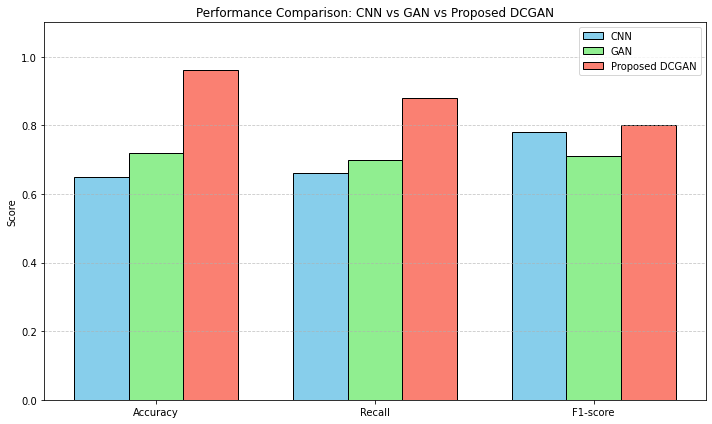

In [255]:
labels = list(metrics.keys())
x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, [m[0] for m in metrics.values()], width, label='CNN', color='skyblue', edgecolor='black')
plt.bar(x, [m[1] for m in metrics.values()], width, label='GAN', color='lightgreen', edgecolor='black')
plt.bar(x + width, [m[2] for m in metrics.values()], width, label='Proposed DCGAN', color='salmon', edgecolor='black')

plt.ylabel('Score')
plt.title('Performance Comparison: CNN vs GAN vs Proposed DCGAN')
plt.xticks(x, labels)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


***ROC CURVE***

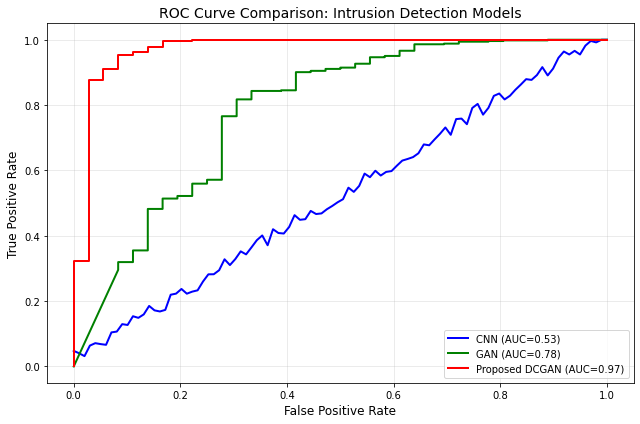

In [256]:
plt.figure(figsize=(9, 6))
plt.plot(fpr_cnn, tpr_cnn, label=f'CNN (AUC={roc_auc:.2f})', color='blue', lw=2)
plt.plot(fpr_gan, tpr_gan, label=f'GAN (AUC={auc_gan:.2f})', color='green', lw=2)
plt.plot(fpr_proposeddcgan, tpr_proposeddcgan, label=f'Proposed DCGAN (AUC={auc_proposeddcgan:.2f})', color='red', lw=2)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison: Intrusion Detection Models', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()